In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2022/data.csv


# Tabular Playground Series - Jun 2022

The June edition of the 2022 Tabular Playground series is all about data imputation. The dataset has similarities to the May 2022 Tabular Playground, except that there are no targets. Rather, there are missing data values in the dataset, and your task is to predict what these values should be.



In [2]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2022/data.csv")

## 1 Exploratory data analysis

In [3]:
df.shape

(1000000, 81)

In [4]:
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [5]:
df.tail()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
999995,999995,-0.823740,0.285673,0.343307,-0.436747,1.700549,-1.069432,0.819698,-0.168457,-0.429074,...,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,999996,-0.769106,-0.387363,-1.227469,0.601183,0.351161,0.219475,-0.530277,0.853452,0.608646,...,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807
999997,999997,0.147534,-0.715276,-0.465049,-1.988941,-1.594535,-1.044882,3.159455,-0.634108,0.890382,...,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502
999998,999998,-1.709886,-0.813785,-1.866536,-0.179420,2.231478,1.460122,-0.220585,-0.118496,-0.140064,...,-1.135003,-5.127360,-3.903728,-1.597023,0.893159,0.379434,0.846266,-1.085554,3.122423,0.004831
999999,999999,-0.806380,-0.025251,-0.875477,0.802440,0.889492,-1.030684,-0.209134,-0.341420,2.367991,...,1.079820,-1.098772,-1.428362,-1.255175,0.509799,0.711470,-2.448386,2.334131,5.425421,-0.828847


In [6]:
pd.value_counts(df.dtypes)

float64    55
int64      26
dtype: int64

In [7]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
row_id,1000000.0,499999.500000,288675.278932,0.000000,249999.750000,499999.500000,749999.250000,999999.000000
F_1_0,981603.0,-0.000687,1.000784,-4.664447,-0.674667,-0.000769,0.673181,5.039177
F_1_1,981784.0,0.002091,0.999878,-4.790594,-0.672284,0.002049,0.675997,5.042807
F_1_2,981992.0,0.000551,0.999825,-4.870645,-0.673783,0.001386,0.674490,5.130025
F_1_3,981750.0,0.000982,0.999847,-5.053023,-0.672211,0.000370,0.674852,5.462472
...,...,...,...,...,...,...,...,...
F_4_10,981775.0,0.038282,0.706913,-10.353951,-0.385768,0.102679,0.529550,2.548404
F_4_11,981881.0,0.551900,4.996632,-26.276588,-2.791428,0.203056,3.646324,31.229363
F_4_12,981694.0,0.333509,2.383485,-11.524137,-1.268732,0.354137,1.947385,11.341926
F_4_13,982005.0,0.330047,2.364036,-10.661978,-1.298927,0.295049,1.916931,11.901409


<AxesSubplot:title={'center':'Unique Values per feature'}>

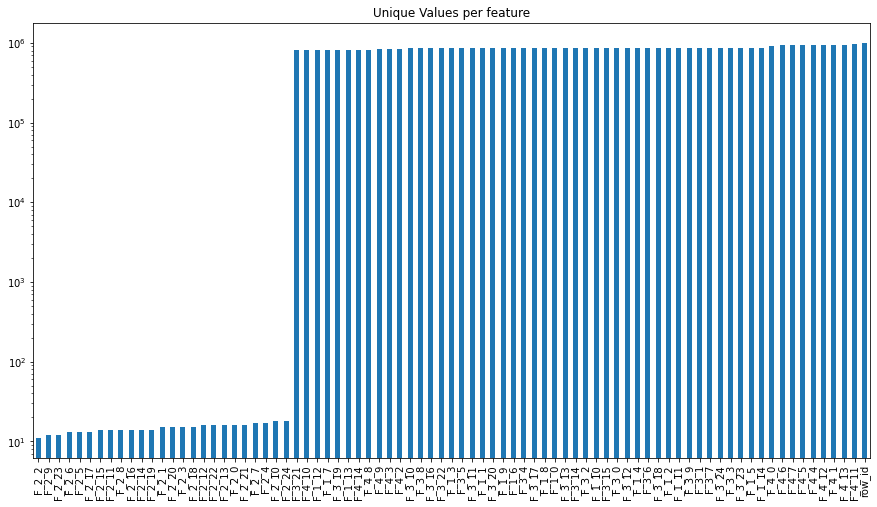

In [8]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

In [9]:
n_duplicates = df.drop(["row_id"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [10]:
missing = df.isnull().sum()
print(f"Missing values per feature: {missing}")

Missing values per feature: row_id        0
F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
          ...  
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
Length: 81, dtype: int64


array([[<AxesSubplot:title={'center':'F_1_0'}>,
        <AxesSubplot:title={'center':'F_1_1'}>,
        <AxesSubplot:title={'center':'F_1_2'}>,
        <AxesSubplot:title={'center':'F_1_3'}>,
        <AxesSubplot:title={'center':'F_1_4'}>],
       [<AxesSubplot:title={'center':'F_1_5'}>,
        <AxesSubplot:title={'center':'F_1_6'}>,
        <AxesSubplot:title={'center':'F_1_7'}>,
        <AxesSubplot:title={'center':'F_1_8'}>,
        <AxesSubplot:title={'center':'F_1_9'}>],
       [<AxesSubplot:title={'center':'F_1_10'}>,
        <AxesSubplot:title={'center':'F_1_11'}>,
        <AxesSubplot:title={'center':'F_1_12'}>,
        <AxesSubplot:title={'center':'F_1_13'}>,
        <AxesSubplot:title={'center':'F_1_14'}>],
       [<AxesSubplot:title={'center':'F_2_0'}>,
        <AxesSubplot:title={'center':'F_2_1'}>,
        <AxesSubplot:title={'center':'F_2_2'}>,
        <AxesSubplot:title={'center':'F_2_3'}>,
        <AxesSubplot:title={'center':'F_2_4'}>],
       [<AxesSubplot:title={'ce

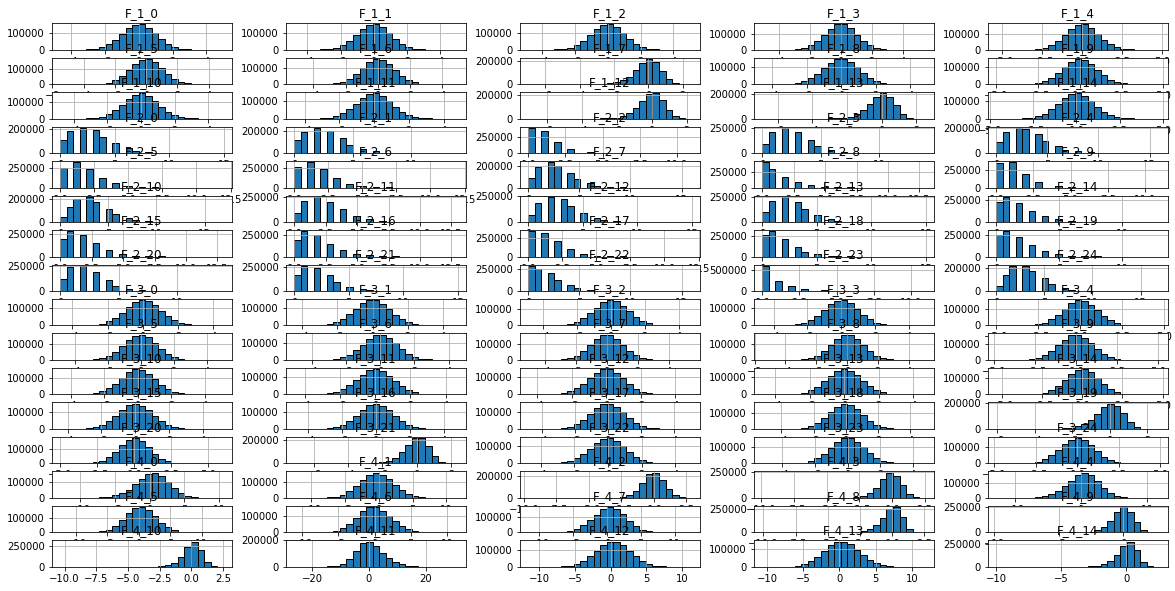

In [11]:
df.drop('row_id', axis=1).hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')

# Fill NaNs

In [12]:
df_copy = df.interpolate(method='linear', limit_direction="both")

# Submission

In [13]:
submission_df = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv")

In [14]:
submission_df[['row','col']]=submission_df['row-col'].str.split('-', expand=True)
submission_list=[]
for i in range(1000000):
    submission_list.append(df_copy.loc[int(submission_df.loc[i,'row']),submission_df.loc[i,'col']])
submission_df['value']=submission_list
submission_df=submission_df.drop(['row','col'],axis=1)
submission_df.to_csv('submission.csv', index=False)